## Importing Libraries

In [2]:
import numpy as np
import pandas as pd

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv('diabetes.csv')
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,102,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [5]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
268/500

0.536

In [7]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

## Model Training

In [9]:
adaboost = AdaBoostClassifier(n_estimators=70)
adaboost.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=70)

In [10]:
# Testing Data 
y_pred = adaboost.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confustion Matrix:\n', cnf_matrix)

acc = accuracy_score(y_test, y_pred)
print('Accuracy Score:', acc)

clf_report = classification_report(y_test, y_pred)
print(' Classification Report:\n', clf_report)

Confustion Matrix:
 [[128  18]
 [ 34  51]]
Accuracy Score: 0.7748917748917749
 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       146
           1       0.74      0.60      0.66        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



In [11]:
# Training Data 
y_pred_train = adaboost.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print('Confustion Matrix:\n', cnf_matrix)

acc = accuracy_score(y_train, y_pred_train)
print('Accuracy Score:', acc)

clf_report = classification_report(y_train, y_pred_train)
print(' Classification Report:\n', clf_report)

Confustion Matrix:
 [[319  35]
 [ 52 131]]
Accuracy Score: 0.8379888268156425
 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       354
           1       0.79      0.72      0.75       183

    accuracy                           0.84       537
   macro avg       0.82      0.81      0.82       537
weighted avg       0.84      0.84      0.84       537



In [12]:
adaboost.feature_importances_

array([0.24285714, 0.08571429, 0.05714286, 0.14285714, 0.14285714,
       0.24285714, 0.08571429])

In [13]:
s1 = pd.Series(adaboost.feature_importances_, index=x.columns)
s1

Glucose                     0.242857
BloodPressure               0.085714
SkinThickness               0.057143
Insulin                     0.142857
BMI                         0.142857
DiabetesPedigreeFunction    0.242857
Age                         0.085714
dtype: float64

<AxesSubplot:>

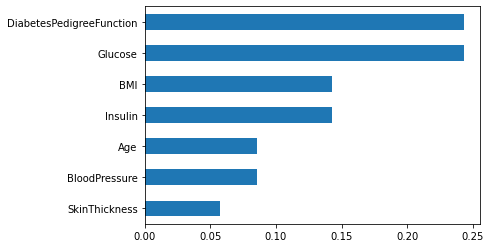

In [14]:
s1.sort_values().plot(kind='barh')